In [4]:
#!pip install praw

# Importing Required Libraries and Reddit API Credentials

In [5]:
import praw  #Importing PRAW Module

# Reddit API Credentials

In [6]:
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" # Setting up user agent for Reddit API request
# Creating Reddit instance with provided credentials
reddit = praw.Reddit(
    client_id="QWm1pNTk8JgJg4mRf4r6HQ",  # Inserting client ID
    client_secret="mNrJ5qUOl5vI9pIsuPX-dTzB4dDjNA", # Inserting client secret
    user_agent=user_agent
)

In [7]:
import pandas as pd  # Importing Pandas as pd
import numpy as np   # Importing numpy as np
import re            # RegEx : Regular expression

# Hot new rising topics

In [12]:
# Hot new rising topics

headlines = set()
# Iterating through submissions in the hot section of the Tollywood subreddit
for submission in reddit.subreddit("Tollywood").hot(limit=None):
    print(submission.title)  #Subreddit Title
    print(submission.id)     #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Sundaram Master (2024) - Review/Discussion Thread. SPOILERS MUST BE TAGGED
1axug0k
saketpalle
1708672276.0
18
0.95
https://www.reddit.com/r/tollywood/comments/1axug0k/sundaram_master_2024_reviewdiscussion_thread/
0


# Retrieving the titles of hot posts in the Tollywood subreddit

In [13]:
headlines = set()
for submission in reddit.subreddit("Tollywood").hot(limit=None): # Retreving the tittle of hot posts in Tollywood subreddit.
    headlines.add(submission.title)
print(len(headlines)) # Printing the no of Unique Headlines

836


In [16]:
#Create a dataframe from the scrapped data 
Tollywood_df = pd.DataFrame(headlines)

In [17]:
Tollywood_df.head() # Printing the Top Five Rows

,0
0,Raghunandana | HanuMan
1,Mountains O' Things
2,Should I watch this movie?
3,What's the most toxic written character ever ?
4,didnt understand what happened in 3:55 back wh...


In [18]:
Tollywood_df.columns # Printing the Column Names.

RangeIndex(start=0, stop=1, step=1)

In [19]:
Tollywood_df.columns = ['Titles'] # Adding Column Names

In [20]:
Tollywood_df.head() # Printing top Five Rows

,Titles
0,Raghunandana | HanuMan
1,Mountains O' Things
2,Should I watch this movie?
3,What's the most toxic written character ever ?
4,didnt understand what happened in 3:55 back wh...


In [21]:
Tollywood_df.Titles.duplicated().sum()   # Printing the Sum of Duplicates.

0

# Data Cleaning

In [22]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
Tollywood_df["Titles"]= Tollywood_df["Titles"].apply(cleanTxt)

#Show the clean text
Tollywood_df.head()

,Titles
0,Raghunandana | HanuMan
1,Mountains O' Things
2,Should I watch this movie?
3,What's the most toxic written character ever ?
4,didnt understand what happened in 355 back whe...


# Remove emoji and Unicode from the reddit data.

In [23]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Tollywood_df["Titles"]= Tollywood_df["Titles"].apply(remove_emoji)

#Show the clean text
Tollywood_df.head()

,Titles
0,Raghunandana | HanuMan
1,Mountains O' Things
2,Should I watch this movie?
3,What's the most toxic written character ever ?
4,didnt understand what happened in 355 back whe...


In [24]:
#!pip install textblob

# Importing TextBlob

In [25]:
from textblob import TextBlob ## Importing TextBlob
from wordcloud import WordCloud, STOPWORDS  

# Sentiment Analysis

In [26]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Tollywood_df['Subjectivity'] = Tollywood_df['Titles'].apply(getSubjectivity)
Tollywood_df['Polarity'] = Tollywood_df['Titles'].apply(getPolarity)

#Now display data
Tollywood_df.head()

,Titles,Subjectivity,Polarity
0,Raghunandana | HanuMan,0.0,0.0
1,Mountains O' Things,0.0,0.0
2,Should I watch this movie?,0.0,0.0
3,What's the most toxic written character ever ?,0.5,0.5
4,didnt understand what happened in 355 back whe...,0.0,0.0


# Grouping Polarity into Sentiment Categories

In [27]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
Tollywood_df["Insight"] = Tollywood_df["Polarity"].apply(getInsight)

Tollywood_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Raghunandana | HanuMan,0.000000,0.000000,Neutral
1,Mountains O' Things,0.000000,0.000000,Neutral
2,Should I watch this movie?,0.000000,0.000000,Neutral
3,What's the most toxic written character ever ?,0.500000,0.500000,Positive
4,didnt understand what happened in 355 back whe...,0.000000,0.000000,Neutral
5,Are there any other biopics in Telugu cinema w...,0.250000,-0.062500,Negative
6,Which one do you prefer Telugu one says I'm no...,0.000000,0.000000,Neutral
7,Questions about Khansaar city,0.000000,0.000000,Neutral
8,What are your thoughts on this character From ...,0.000000,0.000000,Neutral
9,Guntur kaaram math question,0.000000,0.000000,Neutral


In [28]:
import seaborn as sns # Importing seaborn Package
import warnings 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
plt.style.use('fivethirtyeight')

# Visualizing Sentiment Analysis

# Plotting Sentiment Scores

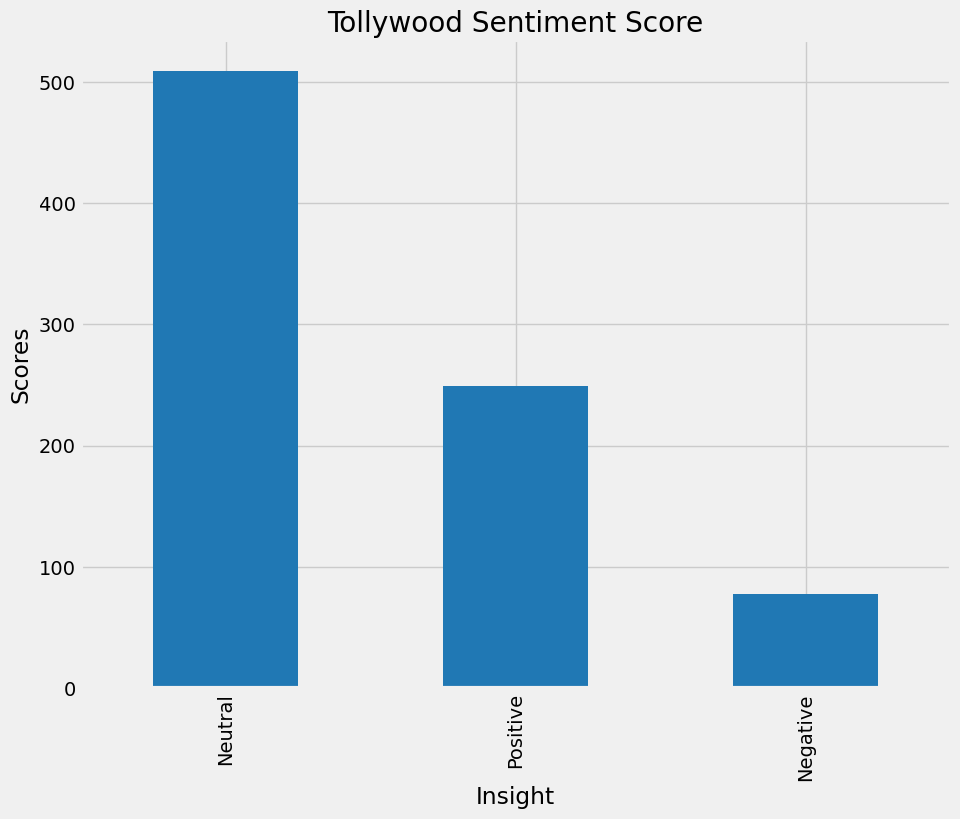

In [31]:
#Plot the values count of sentiment
plt.title("Tollywood Sentiment Score")
plt.xlabel("Sentiment") # X-axis
plt.ylabel("Scores") # Y-axis
plt.rcParams["figure.figsize"] = (8,8) # Figure Size
Tollywood_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Generating Word Clouds

# Word Cloud with Default Settings

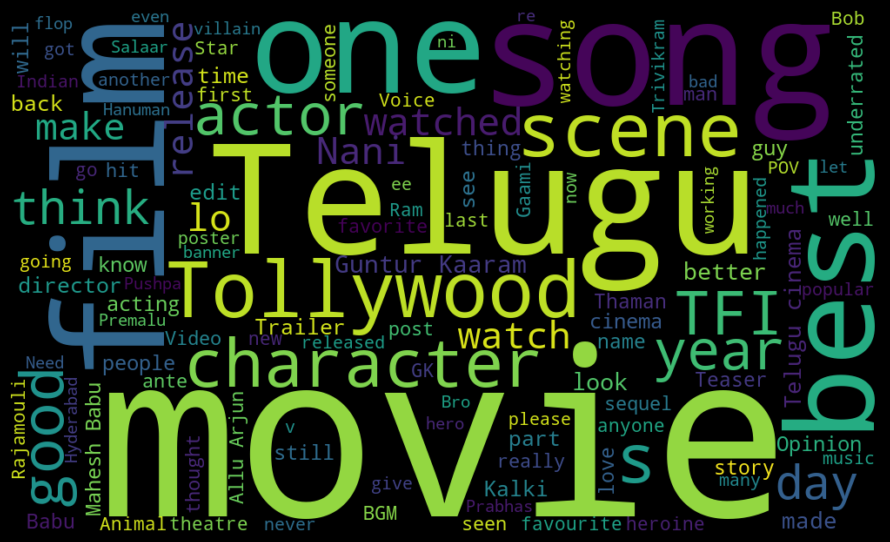

In [33]:
text = ' '.join( [twts for twts in Tollywood_df['Titles']] ) # To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 120,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Word Cloud with Customized Settings

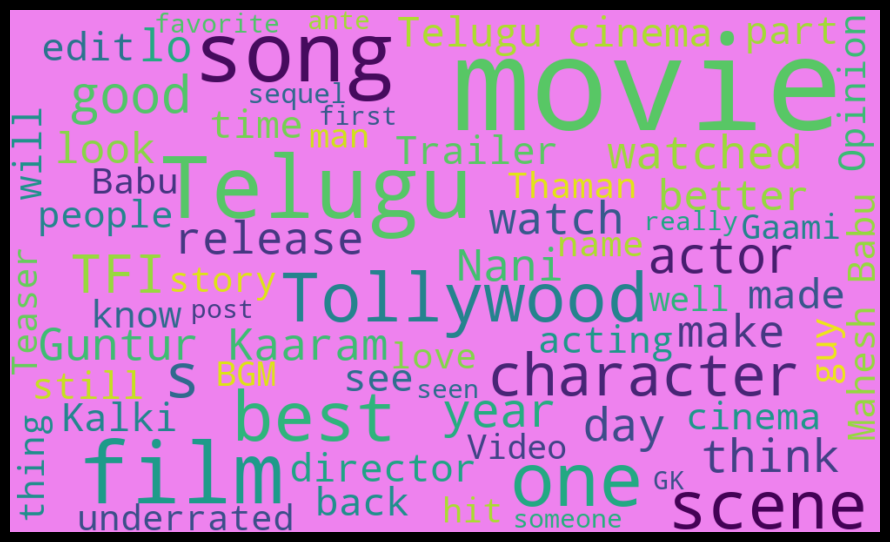

In [49]:
# Generate word cloud
wordcloud = WordCloud(width=1000, height=600,
                      max_words=120,
                      stopwords=STOPWORDS,
                      background_color="Violet",  # Change background color here
                      colormap='viridis',  # Change colormap for coloring the words
                      contour_color='steelblue',  # Add contour color around the words
                      contour_width=2,  # Set contour width
                      max_font_size=150,  # Set maximum font size
                      min_font_size=30,  # Set minimum font size
                      random_state=42).generate(text)  # Set random state for reproducibility

# Display the generated image
plt.figure(figsize=(10, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')  # Change interpolation method here
plt.axis("off")
plt.show()
